# MSER

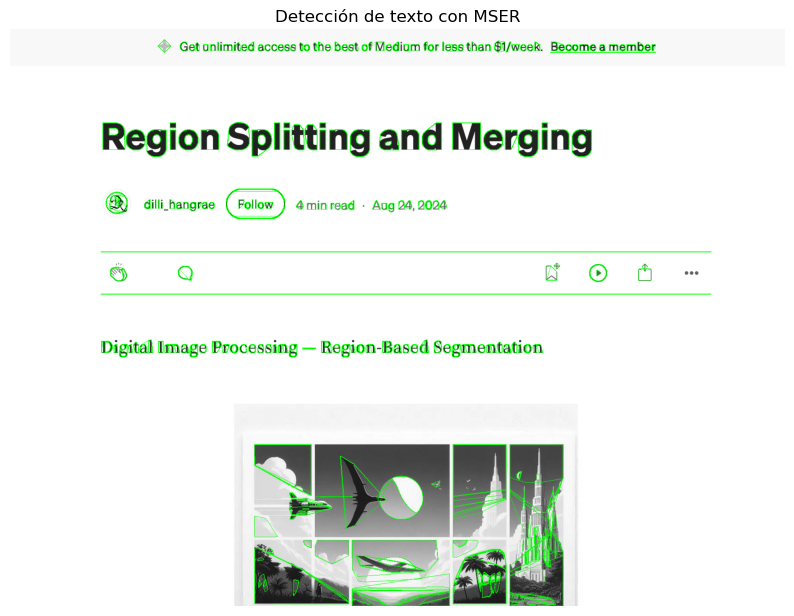

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar imagen en escala de grises
imagen = cv2.imread('assets/text.jpg', cv2.IMREAD_GRAYSCALE)

# Crear el detector MSER
mser = cv2.MSER_create()

# Detectar regiones MSER
regiones, _ = mser.detectRegions(imagen)

# Crear una imagen en color para dibujar
imagen_color = cv2.cvtColor(imagen, cv2.COLOR_GRAY2BGR)

# Dibujar contornos de las regiones detectadas
for region in regiones:
    contorno = cv2.convexHull(region.reshape(-1, 1, 2))
    cv2.polylines(imagen_color, [contorno], True, (0, 255, 0), 1)

# Convertir BGR a RGB para matplotlib
imagen_rgb = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB)

# Mostrar con matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(imagen_rgb)
plt.title('Detección de texto con MSER')
plt.axis('off')
plt.show()


# MSER + OCR

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt


# Cargar imagen en escala de grises
imagen = cv2.imread('assets/text.jpg')
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

# Crear detector MSER
mser = cv2.MSER_create()

# Detectar regiones
regiones, _ = mser.detectRegions(gris)

# Filtrar regiones y extraer texto
cajas_texto = []
for region in regiones:
    x, y, w, h = cv2.boundingRect(region.reshape(-1, 1, 2))
    if w > 10 and h > 10 and w/h < 5:  # filtro básico para texto
        roi = gris[y:y+h, x:x+w]
        texto = pytesseract.image_to_string(roi, config='--psm 7')  # 'psm 7' asume una sola línea
        if texto.strip():
            cajas_texto.append((x, y, w, h, texto.strip()))
            cv2.rectangle(imagen, (x, y), (x+w, y+h), (0, 255, 0), 1)

# Mostrar resultado
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(imagen_rgb)
plt.title('Texto detectado con MSER + Tesseract')
plt.axis('off')
plt.show()

# Imprimir textos detectados
for x, y, w, h, texto in cajas_texto:
    print(f'Texto detectado en ({x}, {y}): {texto}')
